# Reinforcement Learning

# Markov Decision Process

This notebook presents some examples of Markov Decison Processes, where an **agent** interacts with its **environment** and collects **rewards**.

Credits: T. Bonald, Telecom Paris

In [1]:
import numpy as np
from copy import deepcopy
import sys
PATH = ''

In [2]:
# This cell has to be run ONLY if you are using google colab on google drive
from google.colab import drive
drive.mount('/content/drive')
PATH = "/content/drive/MyDrive/Colab Notebooks/RL/ENSAI-smart-data/" #Put here the correct path
sys.path.append(PATH)

Mounted at /content/drive


In [3]:
from model import Walk, Maze, TicTacToe, Nim, ConnectFour
from agent import Agent

Each model is an object of the class ``Environment`` storing the current state. The main methods are:
* ``get_states`` -> list all states (if possible).
* ``get_actions(state)`` -> list available actions in a state.
* ``get_transition(state, action)`` -> get transition probabilities from a given (state, action) pair.
* ``get_reward(state)`` -> get the reward of a given state (*).
* ``is_terminal(state)`` -> whether a state is terminal.
* ``step(action)`` -> apply action in the current state, get reward and modify state.
* ``display`` (when available) -> display current state or get the animation of a sequence of states.


(*) Note that the rewards are attached to states: the reward of a (state, action) pair is that given by the new state, after the transition. In a game for instance, the reward of a state is +1 if this state is terminal and you win, -1 if this state is terminal and you loose, 0 in all other cases.

In [4]:
from model import Environment

## Walk

We start with a walk in a square. Some states have positive rewards.

In [ ]:
# environment
walk = Walk()

In [ ]:
# number of states
walk.Size

(7, 7)

In [ ]:
# List of states
walk.get_states()

[array([0, 0]),
 array([0, 1]),
 array([0, 2]),
 array([0, 3]),
 array([0, 4]),
 array([0, 5]),
 array([0, 6]),
 array([1, 0]),
 array([1, 1]),
 array([1, 2]),
 array([1, 3]),
 array([1, 4]),
 array([1, 5]),
 array([1, 6]),
 array([2, 0]),
 array([2, 1]),
 array([2, 2]),
 array([2, 3]),
 array([2, 4]),
 array([2, 5]),
 array([2, 6]),
 array([3, 0]),
 array([3, 1]),
 array([3, 2]),
 array([3, 3]),
 array([3, 4]),
 array([3, 5]),
 array([3, 6]),
 array([4, 0]),
 array([4, 1]),
 array([4, 2]),
 array([4, 3]),
 array([4, 4]),
 array([4, 5]),
 array([4, 6]),
 array([5, 0]),
 array([5, 1]),
 array([5, 2]),
 array([5, 3]),
 array([5, 4]),
 array([5, 5]),
 array([5, 6]),
 array([6, 0]),
 array([6, 1]),
 array([6, 2]),
 array([6, 3]),
 array([6, 4]),
 array([6, 5]),
 array([6, 6])]

In [ ]:
# current state (=initial state, so far)
walk.state

array([0, 0])

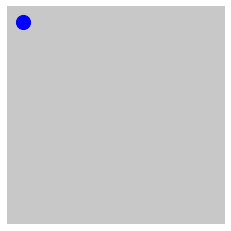

In [ ]:
walk.display()

In [ ]:
walk.get_actions(walk.state)

[(0, 1), (1, 0)]

In [ ]:
# Rewards are attributed to certains states (to be discovered)
walk.Rewards

{(1, 1): 1, (1, 5): 2, (5, 5): 3, (5, 1): 4}

In [ ]:
# List of possible actions for a given state
state = walk.state
walk.get_actions(state)

[(0, 1), (1, 0)]

In [ ]:
# Choose an action - apply the action using the "step" method. What is the output of the step method?
action = (0, 1)
walk.step(action)

(0, False)

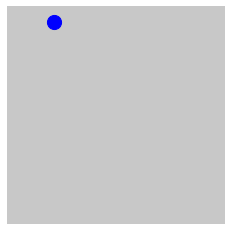

In [ ]:
walk.display()

In [ ]:
walk.state

array([0, 1])

In [ ]:
# agent with random policy (default)
agent = Agent(walk)

In [ ]:
# Get the current state, let the agent choose an action, apply this action
state = walk.state
action = agent.get_action(state)
reward, stop = walk.step(action)

In [ ]:
state

array([0, 1])

In [ ]:
walk.state

array([1, 1])

In [ ]:
action

(1, 0)

In [ ]:
reward,stop

(1, False)

In [ ]:
# What is now the current state ?
walk.state

array([1, 1])

In [ ]:
# Let's go back to the initial state
walk.state = walk.init_state
walk.state()

array([0, 0])

In [ ]:
# Let the agent make 20 moves
stop, states, rewards = agent.get_episode(20)

In [ ]:
# initial state + 20 moves
len(states)

21

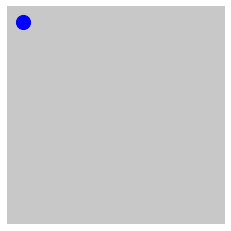

In [ ]:
animation = walk.display(states);

In [ ]:
animation

In [ ]:
# initial reward = 0 by convention
len(rewards)

21

In [ ]:
np.sum(rewards)

5

## Maze

Now let's try to escape a maze!

In [ ]:
maze_map = np.load(PATH+'maze.npy')

In [ ]:
maze = Maze()
init_state = (1, 0)
exit_state = (1, 20)
maze.set_parameters(maze_map, init_state, [exit_state])
maze = Maze()

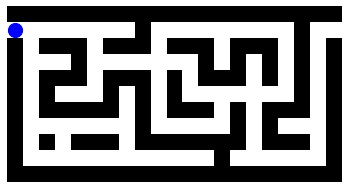

In [ ]:
maze.display()

In [ ]:
maze.state

array([1, 0])

In [ ]:
state = maze.state
reward = maze.get_reward(state)

In [ ]:
reward

-1

In [ ]:
maze.get_actions(state)

[(0, 1)]

In [ ]:
action = (0, 1)

In [ ]:
maze.step(action)

(-1, False)

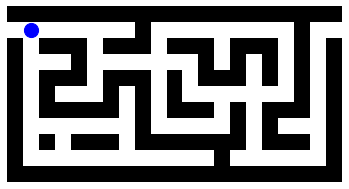

In [ ]:
maze.display()

In [ ]:
maze.get_actions(maze.state)

[(0, 1), (0, -1), (1, 0)]

In [ ]:
# agent with random policy
agent = Agent(maze)

In [ ]:
stop, states, rewards = agent.get_episode()

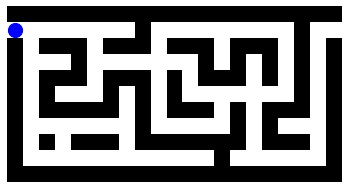

In [ ]:
animation = maze.display(states)
animation

In [ ]:
# time in the Maze
-np.sum(rewards)

100

## Games

Finally, let's play games!<br>
Note that in most games:
* you play against an adversary (which is part of the environment),
* you may play first or second,
* when your adversary plays, you have only one possible action (let your adversary play :-).

We here consider [Tic-Tac-Toe](https://en.wikipedia.org/wiki/Tic-tac-toe), [Nim](https://en.wikipedia.org/wiki/Nim) and [Connect Four](https://en.wikipedia.org/wiki/Connect_Four).
Feel free to add more :-)

## Tic-Tac-Toe

In [ ]:
# game against a random player (default)
game = TicTacToe()

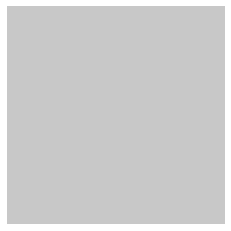

In [ ]:
game.display()

In [ ]:
# player, board (you are player 1, adversary player is -1)
game.state

[1, array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])]

In [ ]:
# you play at random (default)
agent = Agent(game)

In [ ]:
action = agent.get_action(game.state)

In [ ]:
action

(0, 2)

In [ ]:
reward, stop = game.step(action)

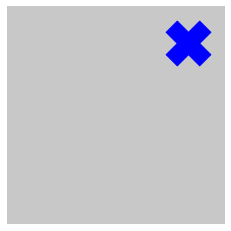

In [ ]:
# you're blue
game.display()

In [ ]:
# plot the state: -1 means it is the adversary's turn
game.state

(-1, array([[0, 0, 1],
        [0, 0, 0],
        [0, 0, 0]]))

In [ ]:
action = agent.get_action(game.state)

In [ ]:
# no action (not your turn)
print(action)

None


In [ ]:
reward, stop = game.step(action)

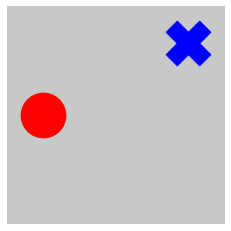

In [ ]:
game.display()

In [ ]:
stop, states, rewards = agent.get_episode()

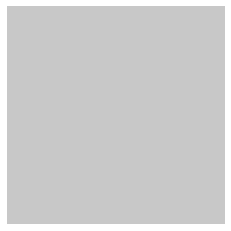

In [ ]:
game.display(states)

In [ ]:
rewards

[0, 0, 0, 0, 0, 0, -1]

In [ ]:
# your adversary starts
game = TicTacToe(play_first=False)

In [ ]:
# you still play at random
agent = Agent(game)

In [ ]:
stop, states, rewards = agent.get_episode()

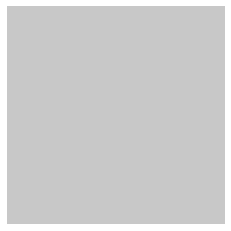

In [ ]:
# you're still blue, red starts
game.display(states)

In [ ]:
rewards

[0, 0, 0, 0, 0, -1]

In [ ]:
# a better policy: look one step ahead: WHAT IS THIS CODE DOING?
def one_step_policy(state):
    game = TicTacToe()
    player, board = state
    actions = game.get_actions(state, player)
    # win move
    for action in actions:
        probs, states, rewards = game.get_model(state, action)
        if player in rewards:
            return [1], [action]
    # move to avoid defeat
    for action in actions:
        state = -player, board
        probs, states, rewards = game.get_model(state, action)
        if -player in rewards:
            return [1], [action]
    # random move
    if len(actions):
        probs = np.ones(len(actions)) / len(actions)
        return probs, actions
    return [1], [None]

In [ ]:
# your adversary is random
game = TicTacToe()

In [ ]:
# you play with one-step ahead policy
agent = Agent(game, one_step_policy)

In [ ]:
stop, states, rewards = agent.get_episode()

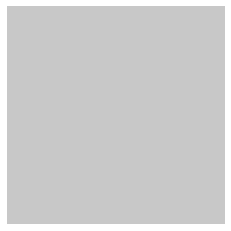

In [ ]:
game.display(states)

In [ ]:
# your adversary also looks one-step ahead
game = TicTacToe(adversary_policy=one_step_policy)

In [ ]:
agent = Agent(game, one_step_policy)

In [ ]:
stop, states, rewards = agent.get_episode()

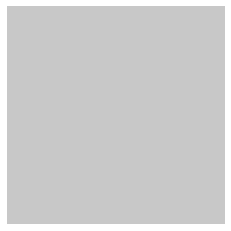

In [ ]:
game.display(states)

## Nim

In [ ]:
# game against a random player (default)
game = Nim()

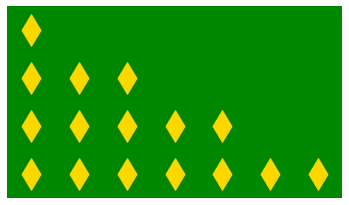

In [ ]:
game.display()

In [ ]:
# player, board
game.state

[1, array([1, 3, 5, 7])]

In [ ]:
# you play at random
agent = Agent(game)

In [ ]:
state = game.state
action = agent.get_action(state)

In [ ]:
action

(2, 5)

In [ ]:
reward, stop = game.step(action)

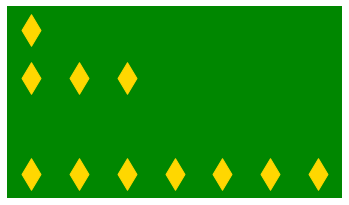

In [ ]:
game.display()

In [ ]:
game = Nim()

In [ ]:
stop, states, rewards = agent.get_episode()

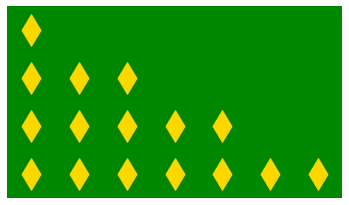

In [ ]:
animation = game.display(states)

In [ ]:
animation

In [ ]:
rewards

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]

## To do 

Play and try to win!

In [ ]:
game = Nim()

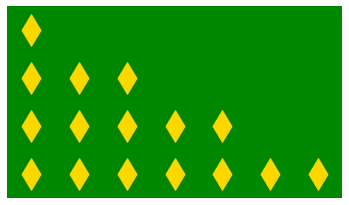

In [ ]:
game.display()

In [ ]:
# your turn
game.get_actions(game.state)

[(0, 1),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7)]

In [ ]:
# select your action
action = (2, 3)
reward, stop = game.step(action)

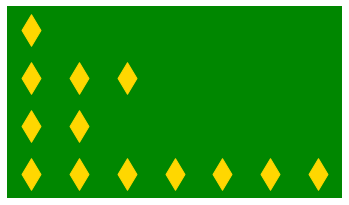

In [ ]:
game.display()

In [ ]:
game.state

(-1, array([1, 3, 2, 7]))

In [ ]:
# adversary
reward, stop = game.step()

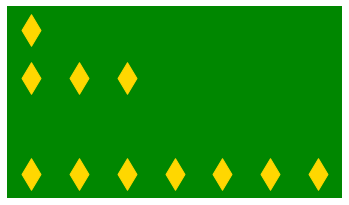

In [ ]:
game.display()

## Connect Four

In [ ]:
# game against a random player
game = ConnectFour()

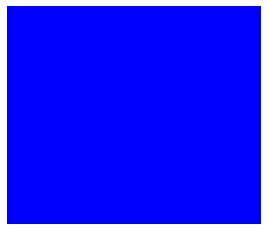

In [ ]:
game.display()

In [ ]:
game.state

[1, array([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])]

In [ ]:
# you play at random
agent = Agent(game)

In [ ]:
stop, states, rewards = agent.get_episode()

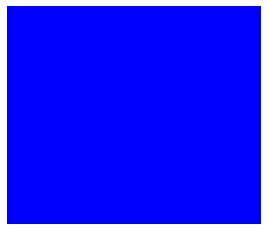

In [ ]:
animation = game.display(states)
animation

In [ ]:
rewards

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [ ]:
# you play yellow
animation

In [ ]:
# a better policy: look one step ahead
def one_step_policy(state):
    game = ConnectFour()
    player, board = state
    actions = game.get_actions(state, player)
    # win move
    for action in actions:
        probs, states, rewards = game.get_model(state, action)
        if player in rewards:
            return [1], [action]
    # move avoiding defeat
    for action in actions:
        state = -player, board
        probs, states, rewards = game.get_model(state, action)
        if -player in rewards:
            return [1], [action]
    # random move
    if len(actions):
        probs = np.ones(len(actions)) / len(actions)
        return probs, actions
    return [1], [None]

In [ ]:
game = ConnectFour()

In [ ]:
agent = Agent(game, one_step_policy)

In [ ]:
stop, states, rewards = agent.get_episode()

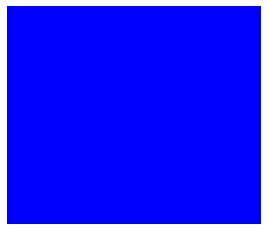

In [ ]:
animation = game.display(states)

In [ ]:
animation